In [2]:
import tensorflow as tf
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from pulearn import (
    MultilayerPerceptron,
    WeightedUnlabelledMultilayerPerceptron,
    UnlabelledExponentialLossMultilayerPerceptron,
    HardBootstrappingMultilayerPerceptron
)

from pulearn.utils import fit_and_plot, synthesize_pu_labels

In [3]:
# Network Parameters
n_input = 2
n_classes = 2

In [10]:
X, y = datasets.make_moons(n_samples=800, noise=0.1, random_state=0)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.5, random_state=42)
Y_train = np.eye(n_classes)[y_train]
print(X_train.shape)
print(Y_train.shape)

(400, 2)
(400, 2)


# Multilayer Perceptron without PU

Using [ 1.  1.]
Epoch: 0001 cost= 0.575330883
Epoch: 0011 cost= 0.181133851
Epoch: 0021 cost= 0.030653066
Epoch: 0031 cost= 0.008357457
Epoch: 0041 cost= 0.004372597
Epoch: 0051 cost= 0.002879966
Epoch: 0061 cost= 0.002066745
Epoch: 0071 cost= 0.001573209
Epoch: 0081 cost= 0.001251268
Epoch: 0091 cost= 0.001022516
Epoch: 0101 cost= 0.000847356
Epoch: 0111 cost= 0.000717064
Epoch: 0121 cost= 0.000611045
Epoch: 0131 cost= 0.000535177
Epoch: 0141 cost= 0.000473187
Epoch: 0151 cost= 0.000421199
Epoch: 0161 cost= 0.000377965
Epoch: 0171 cost= 0.000337538
Epoch: 0181 cost= 0.000278103
Epoch: 0191 cost= 0.000249544
Using [ 1.  1.]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

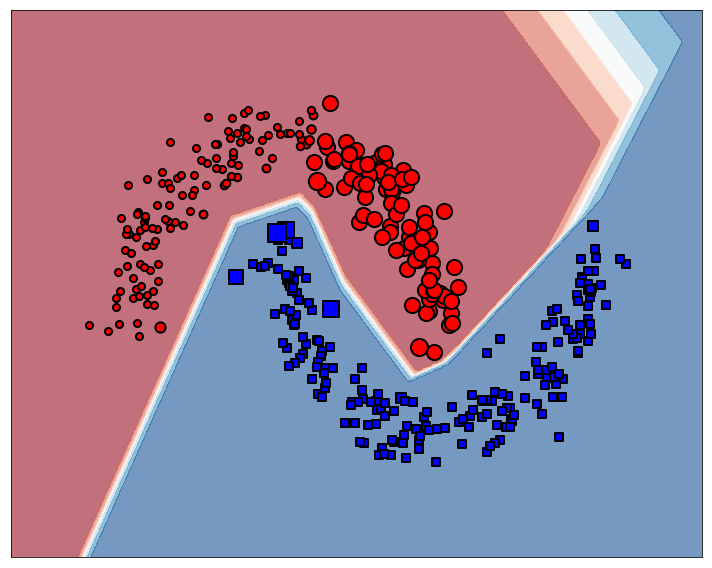

In [18]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-2,
                          alpha=0,
                          epochs=200,
                          verbose=True)
fit_and_plot(X_train, Y_train, mp, marker_size=["loss"], Y_true=Y_train)

# PU setup

In [19]:
Y_train_pu = synthesize_pu_labels(Y_train, random_state=42)

### Normal

Using [ 1.  1.]
Epoch: 0001 cost= 2.012265116
Epoch: 0011 cost= 0.426626354
Epoch: 0021 cost= 0.408159100
Epoch: 0031 cost= 0.394134678
Epoch: 0041 cost= 0.383281074
Epoch: 0051 cost= 0.374407127
Epoch: 0061 cost= 0.364573717
Epoch: 0071 cost= 0.357936703
Epoch: 0081 cost= 0.353583679
Epoch: 0091 cost= 0.347035550
Epoch: 0101 cost= 0.340846844
Epoch: 0111 cost= 0.336780593
Epoch: 0121 cost= 0.332807459
Epoch: 0131 cost= 0.326201059
Epoch: 0141 cost= 0.322256580
Epoch: 0151 cost= 0.314387754
Epoch: 0161 cost= 0.310536675
Epoch: 0171 cost= 0.313821159
Epoch: 0181 cost= 0.308682494
Epoch: 0191 cost= 0.313317373
Using [ 1.  1.]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

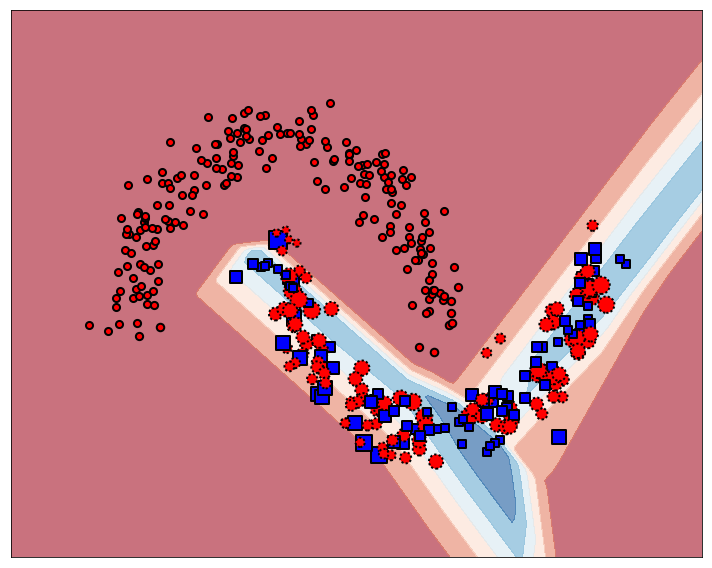

In [24]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=2e-2,
                          alpha=0,
                          epochs=200,
                          class_weight=None,
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), mp, marker_size=["loss"], Y_true=Y_train)

### balanced learning

Using [ 1.          3.23157895]
Epoch: 0001 cost= 1.061556727
Epoch: 0011 cost= 0.818851843
Epoch: 0021 cost= 0.761477903
Epoch: 0031 cost= 0.740739495
Epoch: 0041 cost= 0.731596172
Epoch: 0051 cost= 0.721189484
Epoch: 0061 cost= 0.706689641
Epoch: 0071 cost= 0.675942346
Epoch: 0081 cost= 0.670403734
Epoch: 0091 cost= 0.648658276
Epoch: 0101 cost= 0.637227371
Epoch: 0111 cost= 0.626900315
Epoch: 0121 cost= 0.619943827
Epoch: 0131 cost= 0.610812575
Epoch: 0141 cost= 0.608051524
Epoch: 0151 cost= 0.595581263
Epoch: 0161 cost= 0.591513157
Epoch: 0171 cost= 0.588431478
Epoch: 0181 cost= 0.582242504
Epoch: 0191 cost= 0.580231920
Epoch: 0201 cost= 0.577101991
Epoch: 0211 cost= 0.572087303
Epoch: 0221 cost= 0.567853339
Epoch: 0231 cost= 0.564092413
Epoch: 0241 cost= 0.564707816
Epoch: 0251 cost= 0.553337172
Epoch: 0261 cost= 0.553848729
Epoch: 0271 cost= 0.553794324
Epoch: 0281 cost= 0.548490703
Epoch: 0291 cost= 0.546745196
Using [ 1.          3.23157895]
Using [ 1.          3.23157895]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

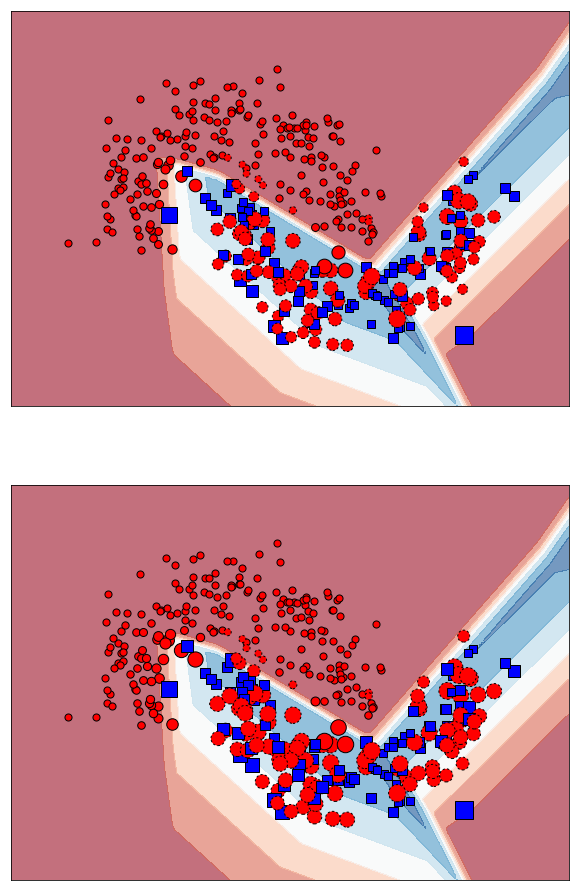

In [20]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=1e-2,
                          alpha=0,
                          epochs=300,
                          class_weight="balanced",
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), mp, marker_size=["loss", "gradient"], Y_true=Y_train)

### Weighted unlabelled sample

Using [ 1.          3.23157895]
Re-weighing to [ 1.          6.46315789]
Epoch: 0001 cost= 1.749408364
Epoch: 0011 cost= 1.037600353
Epoch: 0021 cost= 0.955931500
Epoch: 0031 cost= 0.780143529
Epoch: 0041 cost= 0.718774885
Epoch: 0051 cost= 0.711056948
Epoch: 0061 cost= 0.709680662
Epoch: 0071 cost= 0.719564334
Epoch: 0081 cost= 0.691700742
Epoch: 0091 cost= 0.687147841
Epoch: 0101 cost= 0.668432817
Epoch: 0111 cost= 0.680644453
Epoch: 0121 cost= 0.671970904
Epoch: 0131 cost= 0.675192714
Epoch: 0141 cost= 0.686623842
Epoch: 0151 cost= 0.684002191
Epoch: 0161 cost= 0.665866762
Epoch: 0171 cost= 0.688795060
Epoch: 0181 cost= 0.683358714
Epoch: 0191 cost= 0.669063956
Epoch: 0201 cost= 0.653135702
Epoch: 0211 cost= 0.652733967
Epoch: 0221 cost= 0.675871581
Epoch: 0231 cost= 0.663632110
Epoch: 0241 cost= 0.658702999
Epoch: 0251 cost= 0.670704693
Epoch: 0261 cost= 0.651615068
Epoch: 0271 cost= 0.647402920
Epoch: 0281 cost= 0.649707451
Epoch: 0291 cost= 0.659552515
Using [ 1.          3.23157

<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

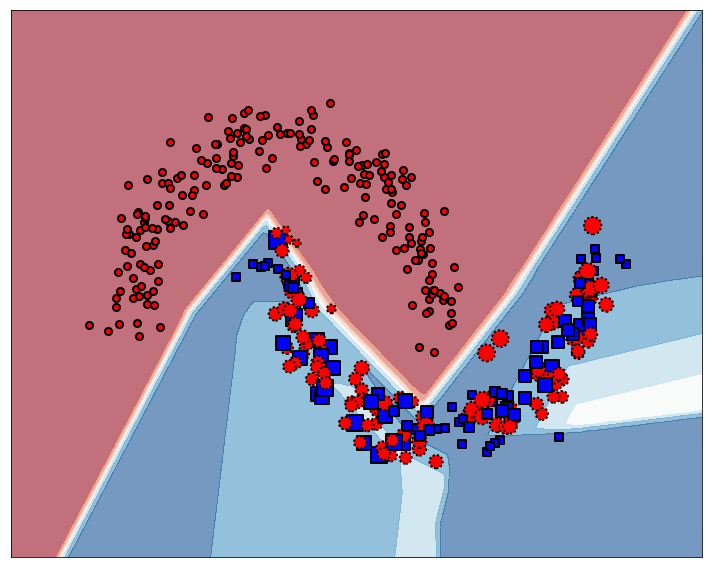

In [42]:
mp = WeightedUnlabelledMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-2,
                          alpha=0,
                          epochs=300,
                          class_weight="balanced",
                          unlabelled_weight={0:0.5, 1:1},
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), mp, marker_size=["loss"], Y_true=Y_train)

Using [ 1.          3.23157895]
Re-weighing to [ 1.          8.07894737]
('Epoch:', '0001', 'cost=', '2.140283167')
('Epoch:', '0011', 'cost=', '1.545854658')
('Epoch:', '0021', 'cost=', '1.310089082')
('Epoch:', '0031', 'cost=', '1.174658448')
('Epoch:', '0041', 'cost=', '1.122995287')
('Epoch:', '0051', 'cost=', '1.086739868')
('Epoch:', '0061', 'cost=', '1.063006893')
('Epoch:', '0071', 'cost=', '1.049816817')
('Epoch:', '0081', 'cost=', '1.038897857')
('Epoch:', '0091', 'cost=', '1.033068791')
('Epoch:', '0101', 'cost=', '1.023087591')
('Epoch:', '0111', 'cost=', '1.018267125')
('Epoch:', '0121', 'cost=', '1.014843285')
('Epoch:', '0131', 'cost=', '1.013004184')
('Epoch:', '0141', 'cost=', '1.011507571')
('Epoch:', '0151', 'cost=', '1.008947089')
('Epoch:', '0161', 'cost=', '1.006523266')
('Epoch:', '0171', 'cost=', '1.005697116')
('Epoch:', '0181', 'cost=', '1.003909826')
('Epoch:', '0191', 'cost=', '1.002453387')
Using [ 1.          3.23157895]
Re-weighing to [ 1.          8.0789

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

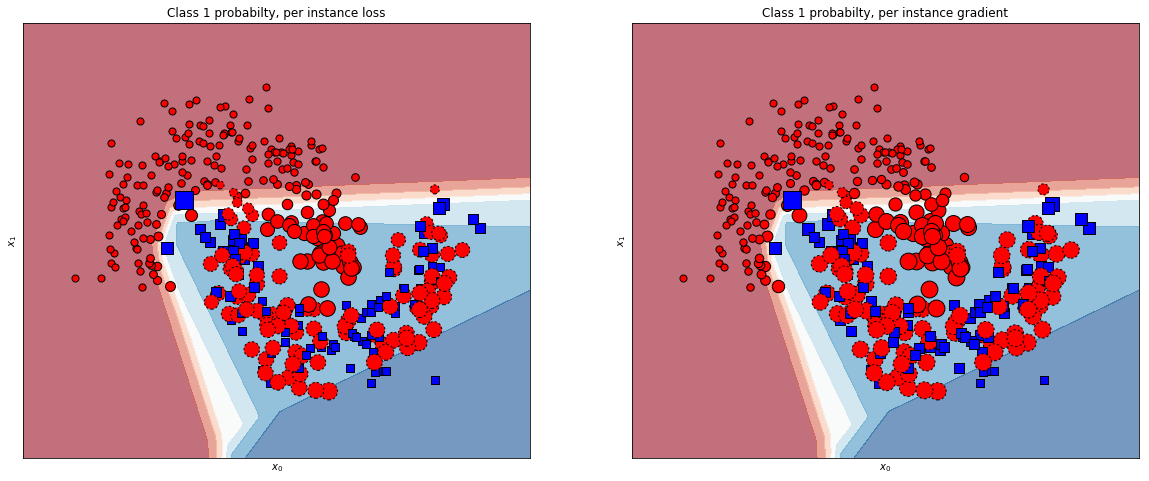

In [12]:
mp = WeightedUnlabelledMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=200,
                          class_weight="balanced",
                          unlabelled_weight={0:0.4, 1:1},
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), mp, marker_size=["loss", "gradient"], Y_true=Y_train)

Using [ 0.5  1. ] for betas.
Using [ 1.          1.19672131]
Epoch: 0001 cost= 0.998572811
Epoch: 0011 cost= 0.403412305
Epoch: 0021 cost= 0.251038905
Epoch: 0031 cost= 0.191772241
Epoch: 0041 cost= 0.167792786
Epoch: 0051 cost= 0.158538226
Epoch: 0061 cost= 0.153507877
Epoch: 0071 cost= 0.150932949
Epoch: 0081 cost= 0.155325033
Epoch: 0091 cost= 0.148311034
Epoch: 0101 cost= 0.145479310
Epoch: 0111 cost= 0.141035981
Epoch: 0121 cost= 0.140449811
Epoch: 0131 cost= 0.139369721
Epoch: 0141 cost= 0.137566570
Epoch: 0151 cost= 0.136338169
Epoch: 0161 cost= 0.138253273
Epoch: 0171 cost= 0.135819381
Epoch: 0181 cost= 0.136246124
Epoch: 0191 cost= 0.136991547
Using [ 1.          1.19672131]
Using [ 1.          1.19672131]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

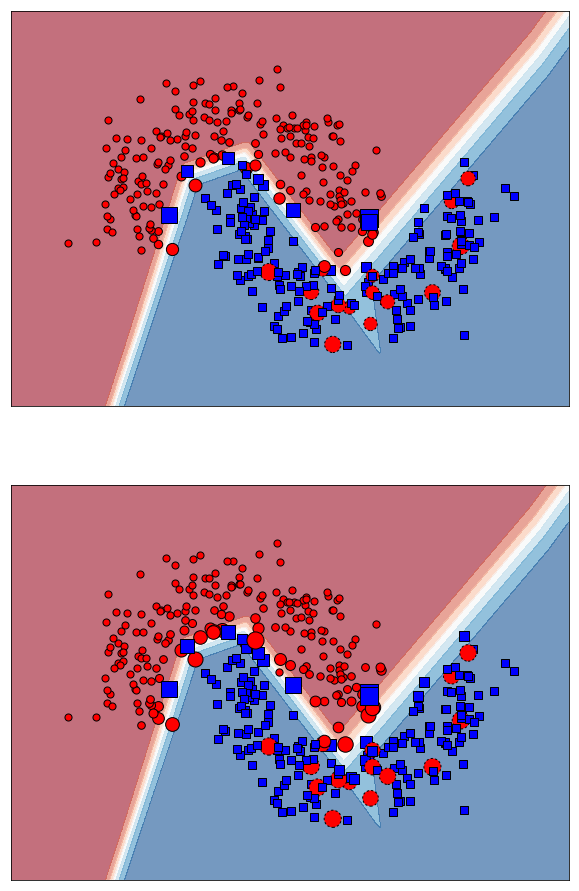

In [22]:
hbmp = HardBootstrappingMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=1e-2,
                          alpha=0,
                          epochs=200,
                          class_weight="balanced",
                          unlabelled_weight={0:0.5, 1:1},
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.1), hbmp, marker_size=["loss", "gradient"], Y_true=Y_train)

## Expontenital loss for unlabelled samples

Using [ 1.          3.23157895]
Epoch: 0001 cost= 0.776844159
Epoch: 0011 cost= 0.382294536
Epoch: 0021 cost= 0.350114994
Epoch: 0031 cost= 0.353107378
Epoch: 0041 cost= 0.271231882
Epoch: 0051 cost= 0.259487584
Epoch: 0061 cost= 0.258263770
Epoch: 0071 cost= 0.256417770
Epoch: 0081 cost= 0.255415522
Epoch: 0091 cost= 0.252378859
Epoch: 0101 cost= 0.253127672
Epoch: 0111 cost= 0.252850991
Epoch: 0121 cost= 0.256329771
Epoch: 0131 cost= 0.365329459
Epoch: 0141 cost= 0.278601311
Epoch: 0151 cost= 0.255680460
Epoch: 0161 cost= 0.256924290
Epoch: 0171 cost= 0.357676379
Epoch: 0181 cost= 0.283571761
Epoch: 0191 cost= 0.250414975
Epoch: 0201 cost= 0.247893907
Epoch: 0211 cost= 0.245970439
Epoch: 0221 cost= 0.248807546
Epoch: 0231 cost= 0.264141776
Epoch: 0241 cost= 0.270208750
Epoch: 0251 cost= 0.251726799
Epoch: 0261 cost= 0.252564091
Epoch: 0271 cost= 0.252560154
Epoch: 0281 cost= 0.250054158
Epoch: 0291 cost= 0.260043811
Using [ 1.          3.23157895]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

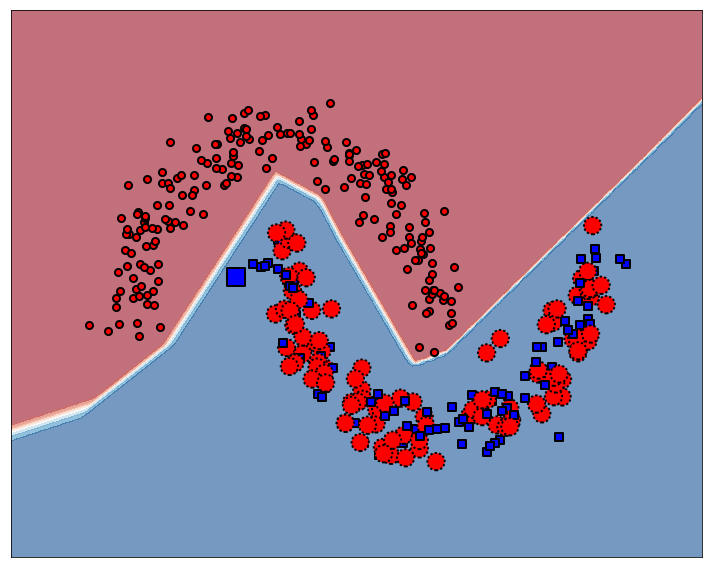

In [39]:
uelmp = UnlabelledExponentialLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-2,
                          alpha=0,
                          epochs=300,
                          class_weight="balanced",
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), uelmp, marker_size=["loss"], Y_true=Y_train)

Using [ 1.          3.23157895]
Epoch: 0001 cost= 0.715053663
Epoch: 0011 cost= 0.399430498
Epoch: 0021 cost= 0.389263943
Epoch: 0031 cost= 0.382314876
Epoch: 0041 cost= 0.381341480
Epoch: 0051 cost= 0.351766542
Epoch: 0061 cost= 0.313364789
Epoch: 0071 cost= 0.278574761
Epoch: 0081 cost= 0.256076865
Epoch: 0091 cost= 0.257042203
Epoch: 0101 cost= 0.248403959
Epoch: 0111 cost= 0.269811664
Epoch: 0121 cost= 0.252592806
Epoch: 0131 cost= 0.250380304
Epoch: 0141 cost= 0.258453429
Epoch: 0151 cost= 0.293992598
Epoch: 0161 cost= 0.268273849
Epoch: 0171 cost= 0.275550544
Epoch: 0181 cost= 0.251546893
Epoch: 0191 cost= 0.247919388
Using [ 1.          3.23157895]
Using [ 1.          3.23157895]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

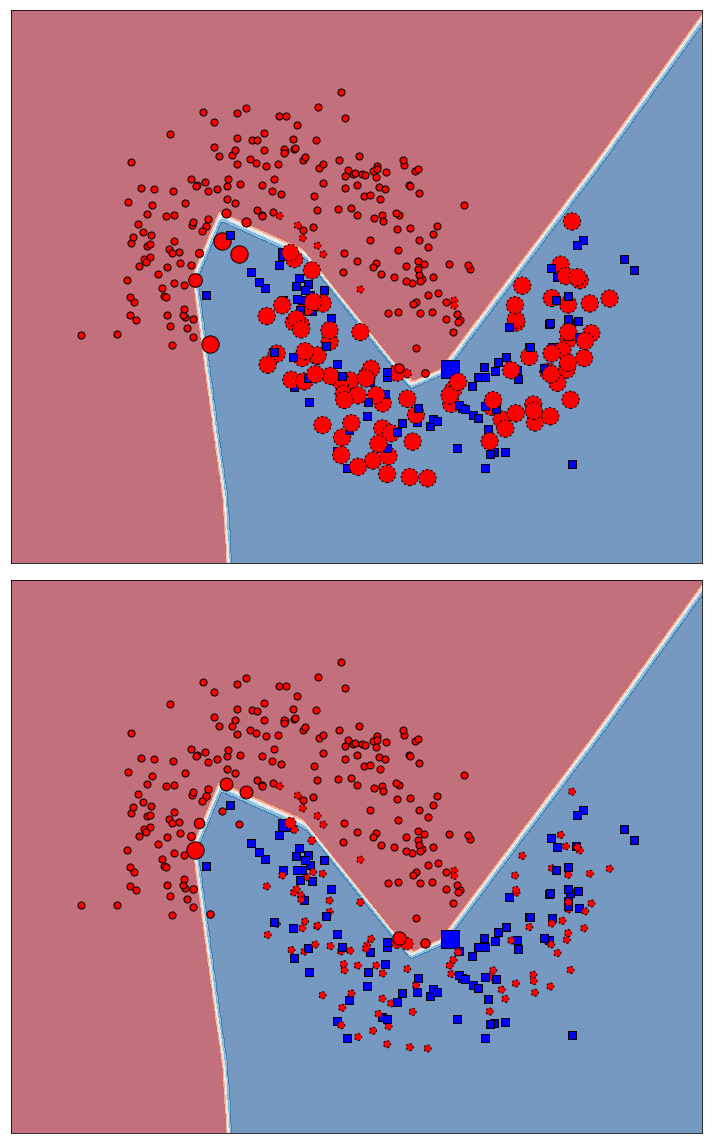

In [32]:
uelmp = UnlabelledExponentialLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-2,
                          alpha=0,
                          epochs=200,
                          class_weight="balanced",
                          unlabelled_weight=None,
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), uelmp, marker_size=["loss", "gradient"], Y_true=Y_train)

Using [ 1.          3.23157895]
Re-weighing to [ 1.          6.46315789]
Epoch: 0001 cost= 2.728914112
Epoch: 0011 cost= 1.125021219
Epoch: 0021 cost= 0.815818369
Epoch: 0031 cost= 0.649999127
Epoch: 0041 cost= 0.594543114
Epoch: 0051 cost= 0.557823658
Epoch: 0061 cost= 0.541852839
Epoch: 0071 cost= 0.521067306
Epoch: 0081 cost= 0.500476636
Epoch: 0091 cost= 0.490632407
Epoch: 0101 cost= 0.483443350
Epoch: 0111 cost= 0.478330031
Epoch: 0121 cost= 0.476304263
Epoch: 0131 cost= 0.473430723
Epoch: 0141 cost= 0.473335534
Epoch: 0151 cost= 0.472798653
Epoch: 0161 cost= 0.471792161
Epoch: 0171 cost= 0.471365392
Epoch: 0181 cost= 0.471458375
Epoch: 0191 cost= 0.470853955
Using [ 1.          3.23157895]
Re-weighing to [ 1.          6.46315789]
Using [ 1.          3.23157895]
Re-weighing to [ 1.          6.46315789]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

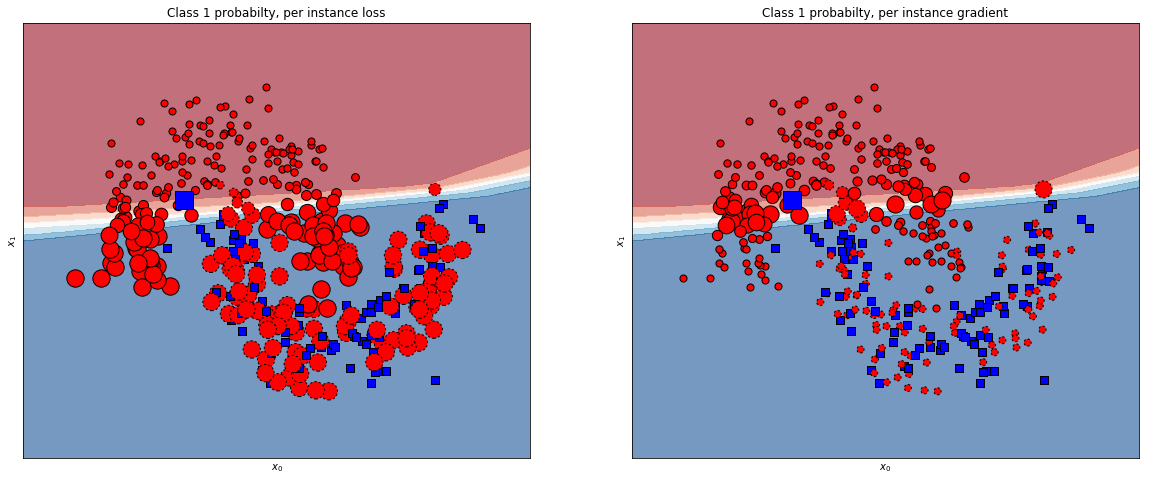

In [14]:
uelmp = UnlabelledExponentialLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=200,
                          class_weight="balanced",
                          unlabelled_weight={0:0.5, 1:1},
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), uelmp, marker_size=["loss", "gradient"], Y_true=Y_train)

## The effect of unlabelled example weight

In [ ]:
n_input = 2
n_classes = 2


n_iters = 10

args_list = []
for it in range(n_iters):
    
    X, y = datasets.make_moons(n_samples=800, noise=0.2)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.5, random_state=42)
    Y_train = np.eye(n_classes)[y_train]
    Y_train_pu = get_PU_labels(Y_train, random_seed=42, verbose=False)
    
    for pct_missing in Y_train_pu.keys():
        for w_unl in np.arange(0.1, 1.01, 0.1):
            for clsf in ['mlp', 'hardb_mlp', 'clsdep_mlp']:
                data = {}
                data["X_train"] = X_train
                data["Y_train"] = Y_train_pu[pct_missing]
                data["X_test"] = X_test
                data["y_test"] = y_test
                data["pct_missing"] = pct_missing
                data["clsf"] = clsf
                data["w_unlabelled"] = w_unl
                args_list.append(data)

def fit_classifier(args):
    pct_missing = args['pct_missing']
    w_unlabelled = args['w_unlabelled']
    
    X_train = args["X_train"]
    Y_train = args["Y_train"]
    X_test = args["X_test"]
    y_test = args["y_test"]
    
    clsf = args["clsf"]
    if clsf == 'mlp':
        classifier = MultilayerPerceptron(n_input=n_input,
              n_classes=n_classes,
              n_hiddens=[8, 8],
              learning_rate=5e-3,
              regularization=0,
              training_epochs=200,
              class_weight=[w_unlabelled, 1],
              imbalanced=True,
              verbose=False)
    elif clsf == 'hardb_mlp':
        classifier = HardBoostrappingMultilayerPerceptron(n_input=n_input,
              n_classes=n_classes,
              n_hiddens=[8, 8],
              learning_rate=5e-3,
              regularization=0,
              training_epochs=200,
              class_weight=None,
              betas=[w_unlabelled, 1],
              imbalanced=True,
              verbose=False)
    elif clsf == 'clsdep_mlp':
        classifier = ClassDepLossMultilayerPerceptron(n_input=n_input,
              n_classes=n_classes,
              n_hiddens=[8, 8],
              learning_rate=5e-3,
              regularization=0,
              training_epochs=200,
              class_weight=[w_unlabelled, 1],
              imbalanced=True,
              verbose=False)
    print("Fitting:", clsf, "Missing:", pct_missing, "Unlabelled weight:", w_unlabelled)
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    auc = metrics.roc_auc_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    acc = metrics.accuracy_score(y_test, y_pred)
    print("Got", "AUC:", auc, "F1-score:", f1, "Accuracy:", acc)
    record = {}
    record['%missing'] = pct_missing
    record['w_unlabelled'] = w_unlabelled
    record["classifier"] = clsf
    record['AUC'] = auc
    record['F1-score'] = f1
    record['Accuracy'] = acc
    return record

import pandas as pd
from multiprocessing import Pool
pool = Pool(processes=6)
acc_grid_list = pool.map(fit_classifier, args_list)
acc_grid = pd.DataFrame(acc_grid_list)
acc_grid.to_csv("weighted_unlabelled_moons.csv")

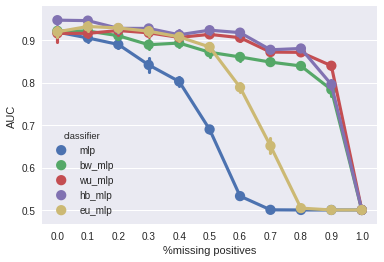

In [6]:
import seaborn as sns
import pandas as pd
%matplotlib inline

import seaborn as sns
import pandas as pd
%matplotlib inline

acc_grid = pd.read_csv('pulearn_moons.csv')

f, ax = plt.subplots(1)

data = acc_grid[acc_grid['%missing']!='%missing']

data = data.apply(pd.to_numeric, errors='ignore')

# # data = data[data['weight_u'].isin([0.3, 0.4, 0.5, 0.6])]

sns.pointplot(x='%missing', y='AUC', hue='classifier', data=data, ax=ax)
ax.set_xlabel('%missing positives')
ax.set_ylabel('AUC')

In [28]:
data = acc_grid[acc_grid['classifier']=='mlp']
data['%missing'].dtype

dtype('float64')